Dataset Link: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset/data

**Importing the Dependencies**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Data Collection

In [4]:
# loading the dataset to a pandas dataframe
df = pd.read_csv("spotify_millsongdata.csv")

In [5]:
df.shape

(57650, 4)

In [6]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [8]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [9]:
# Top artists and songs
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [10]:
df = df.sample(10000)

df = df.drop('link', axis=1).reset_index(drop=True)

In [11]:
df.shape

(10000, 3)

In [12]:
df.head()

,artist,song,text
0,Nat King Cole,All Over The World,All over the world \nAll over the world \n ...
1,Cheap Trick,The Flame,Another night slowly closes in and I feel so l...
2,Ed Sheeran,Where We Land,Treat me beneath this clear night sky \nAnd I...
3,Jason Mraz,Details In The Fabric,Calm down \nDeep breaths \nAnd get yourself ...
4,Everclear,Santa Monica,I am still living with your ghost \nLonely an...


In [13]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

WordCloud to visualize the most common words in the lyrics.

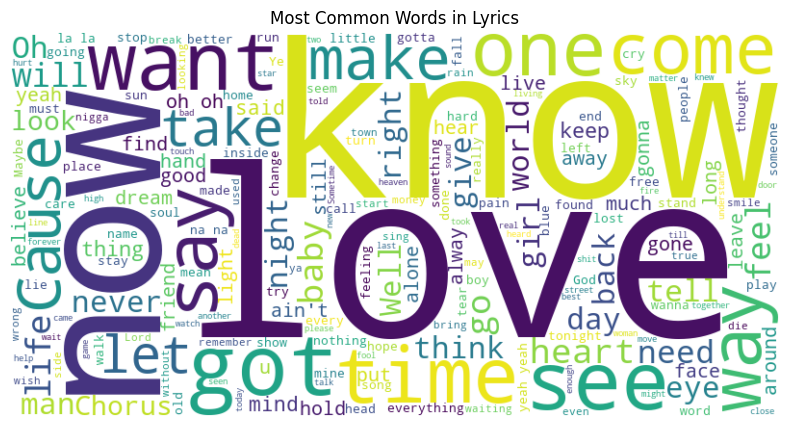

In [14]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

Data Preprocessing

In [15]:
# download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
stop_words = set(stopwords.words('english'))

In [17]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [18]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [19]:
df.head()

,artist,song,text,cleaned_text
0,Nat King Cole,All Over The World,All over the world \nAll over the world \n ...,world world love thing one thing youll see tak...
1,Cheap Trick,The Flame,Another night slowly closes in and I feel so l...,another night slowly closes feel lonely touchi...
2,Ed Sheeran,Where We Land,Treat me beneath this clear night sky \nAnd I...,treat beneath clear night sky lie start feel b...
3,Jason Mraz,Details In The Fabric,Calm down \nDeep breaths \nAnd get yourself ...,calm deep breaths get dressed instead running ...
4,Everclear,Santa Monica,I am still living with your ghost \nLonely an...,still living ghost lonely dreaming west coast ...


In [20]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])
# You get:

# tfidf_matrix: A sparse matrix of shape (10000, 5000)

# Each row: a 5000-dimensional feature vector representing a document

# Each column: corresponds to a word (e.g., "pickup", "dominique", "repeat", etc.)



In [21]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
# This computes pairwise cosine similarity between all songs based on their TF-IDF vectors.
# So cosine_sim[i][j] tells you how similar song i is to song j.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [23]:
df["song"][2]

'Where We Land'

In [24]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("For The First Time")
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
               artist                       song
8073  John Mellencamp              Hurts So Good
2375               U2             The First Time
6845       Bruno Mars                 First Time
3742      Leann Rimes                    Hurt Me
3646        Foreigner  Feels Like The First Time
